<a href="https://colab.research.google.com/github/FaithKare/Unsupervised-Learning-in-R-Supermarket-data-analysis-/blob/master/Reduction_part1_and_Feature_Selection_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question


## a) Specifying the Question

## b) Defining the Metric for Success



At the end of the project, having actionable information that can be used by the marketing department with
the resultant effect being the highest number of sales realized.

## c) Understanding the context
As a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing
department on the most relevant marketing strategies that will result in the highest no. of sales (total price
including tax). The project has been divided into four parts where we’ll explore a recent marketing dataset
by performing various unsupervised learning techniques and later providing recommendations based on our
insights.


## d) Recording the Experimental Design
The following design was used:

• Problem Definition

• Data importation/loading

• Check the Data

• Data Cleaning

• EDA

• Dimensionality Reduction

# Data Loading

In [1]:
# loading the dataset
data1 = read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")


In [2]:
# preview of the top 5 entries of the dataframe 
head(data1 , 5) 

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


In [3]:
# Checking the names of the columns
names(data1)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"

In [4]:
# Checking the structure of the dataset
str(data1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [5]:
# checking The rows and columns in the data 
cat("The dataset has ", dim(data1)[1], "rows and ", dim(data1)[2], " columns")

The dataset has  1000 rows and  16  columns

# Data Cleaning 

In [6]:
# Checking for missing values
colSums(is.na(data1))

# There are no null values

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [7]:
# Checking for duplicated rows
duplicate_rows <- data1[duplicated(data1),]
duplicate_rows

# There are no duplicated rows

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [8]:
# Checking for outliers
# First we get the numeric columns first
num_cols <- unlist(lapply(data1, is.numeric))
num_cols

Invoice.ID                  Branch           Customer.type 
                  FALSE                   FALSE                   FALSE 
                 Gender            Product.line              Unit.price 
                  FALSE                   FALSE                    TRUE 
               Quantity                     Tax                    Date 
                   TRUE                    TRUE                   FALSE 
                   Time                 Payment                    cogs 
                  FALSE                   FALSE                    TRUE 
gross.margin.percentage            gross.income                  Rating 
                   TRUE                    TRUE                    TRUE 
                  Total 
                   TRUE

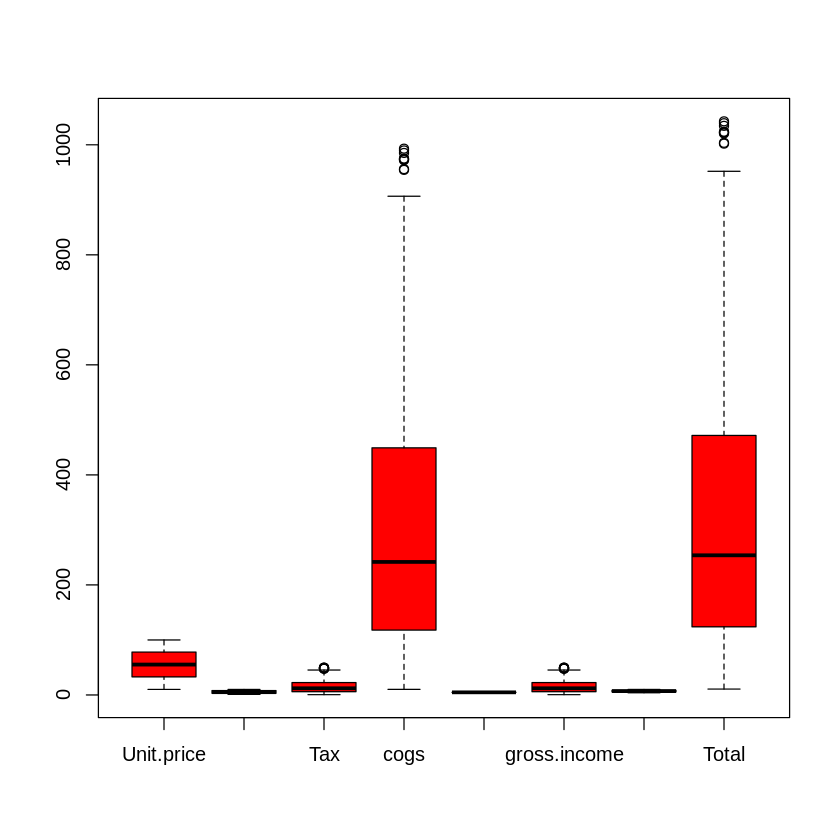

In [9]:
# Evaluating if there are any outliers in the numeric class
#Subset numeric columns of data
num_df <- data1[ ,num_cols]

# Plotting the outliers
boxplot(num_df, col = 'red')

Outliers were in unit price, quantity, tax, cogs, gross margin percentage, gross income, rating & total I will not deal with the outliers since in supermarkets total purchases vary.

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Computing some descriptive statistics for the numerical columns 
desc_stats <- data.frame(
  Max = apply(num_df, 2, max),     # Maximum
  Min = apply(num_df, 2, min),    # minimum
  Median = apply(num_df, 2, median), # median
  Mean = apply(num_df, 2, mean),  # mean
  SD = apply(num_df, 2, sd),       # Standard deviation
  Var = apply(num_df , 2 , var)  # variance
  
)
desc_stats <- round(desc_stats, 1)
desc_stats

,Max,Min,Median,Mean,SD,Var
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit.price,100.0,10.1,55.2,55.7,26.5,702.0
Quantity,10.0,1.0,5.0,5.5,2.9,8.5
Tax,49.6,0.5,12.1,15.4,11.7,137.1
cogs,993.0,10.2,241.8,307.6,234.2,54838.6
gross.margin.percentage,4.8,4.8,4.8,4.8,0.0,0.0
gross.income,49.6,0.5,12.1,15.4,11.7,137.1
Rating,10.0,4.0,7.0,7.0,1.7,3.0
Total,1042.7,10.7,253.8,323.0,245.9,60459.6


In [ ]:
# Getting the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

getmode(data1$Unit.price)
getmode(data1$Quantity)
getmode(data1$Tax)
getmode(data1$cogs)
getmode(data1$gross.margin.percentage)
getmode(data1$gross.income)
getmode(data1$Rating)
getmode(data1$Total)

[1] 83.77

[1] 10

[1] 39.48

[1] 789.6

[1] 4.761905

[1] 39.48

[1] 6

[1] 829.08

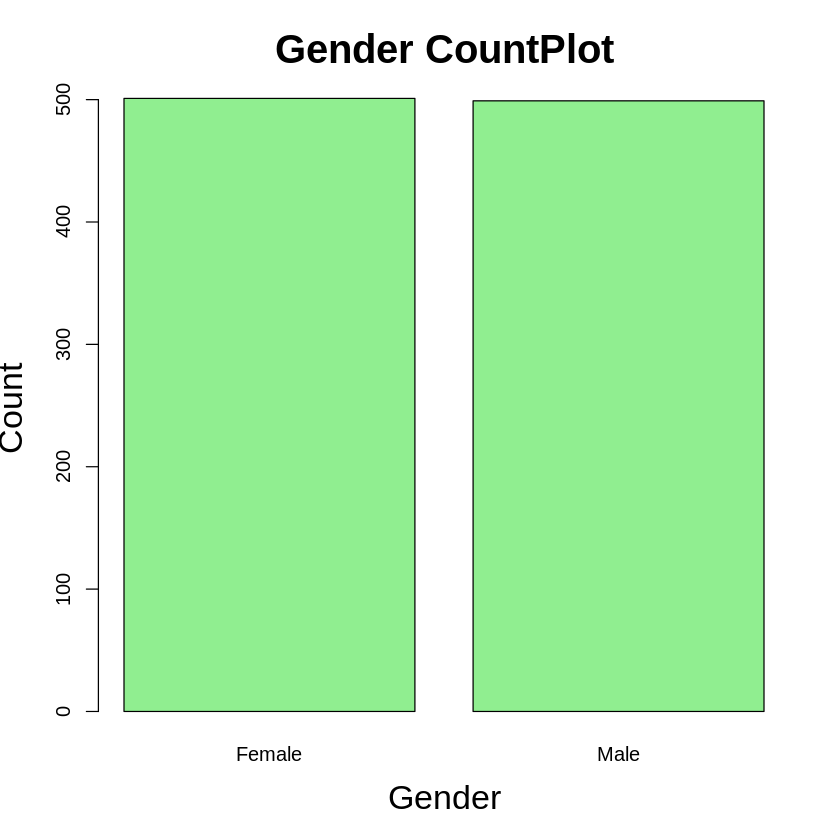

In [ ]:
#BarChart for gender
# x-axis values
gender <- table(data1$Gender)
#plot barchart
barplot(gender,col = "lightgreen", xlab='Gender', ylab ='Count', main = 'Gender CountPlot', cex.main = 2, cex.lab =1.7)


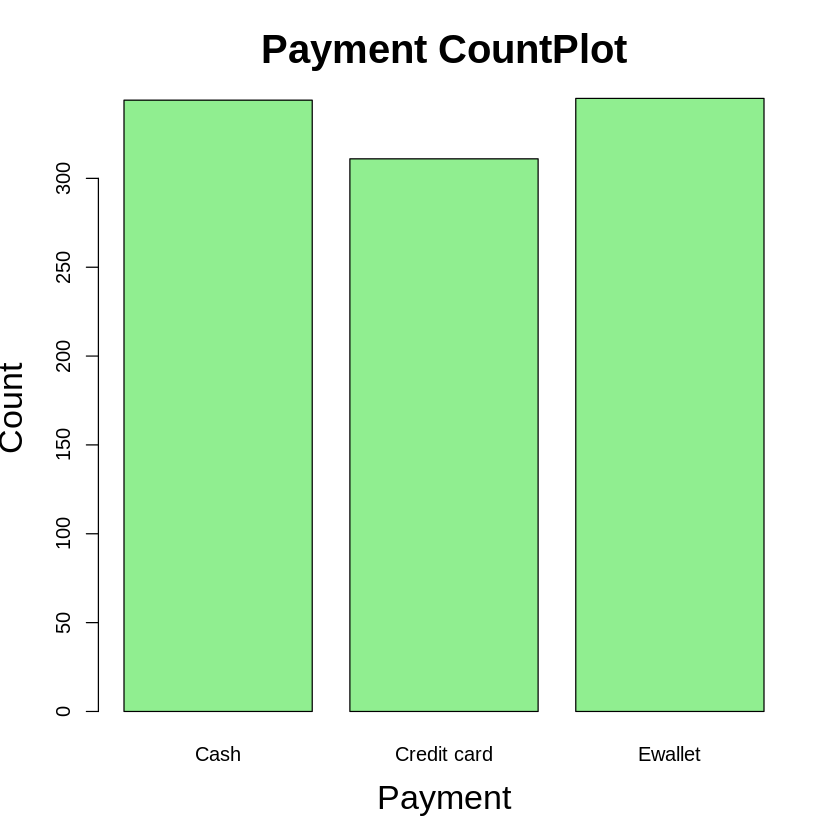

In [ ]:
#BarChart for payment
# x-axis values
payment <- table(data1$Payment)
#plot barchart
barplot(payment,col = "lightgreen", xlab='Payment', ylab ='Count', main = 'Payment CountPlot', cex.main = 2, cex.lab = 1.7)

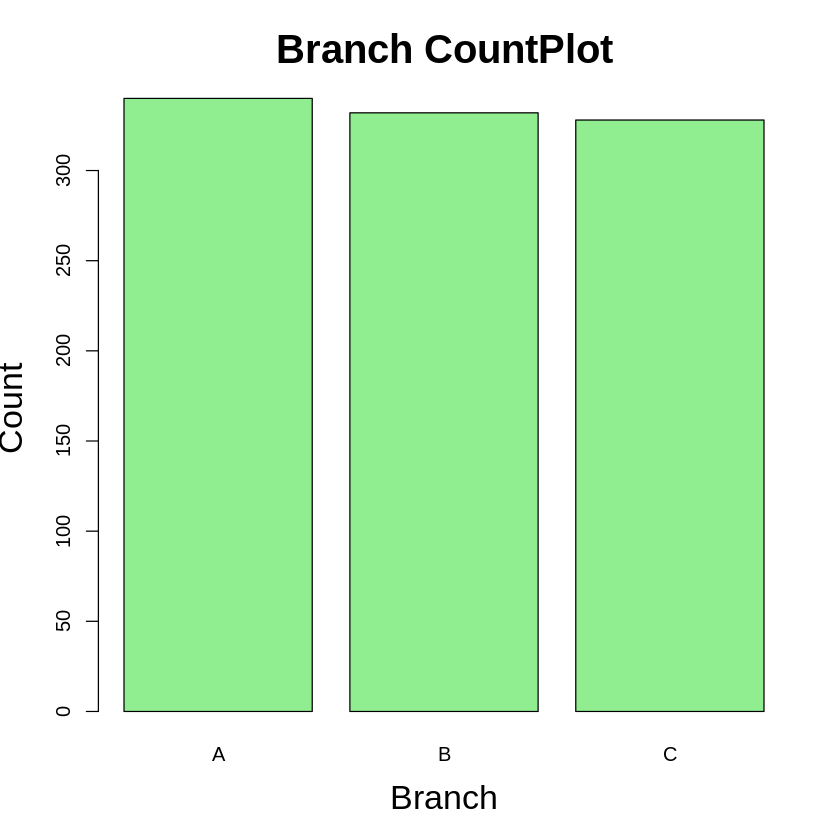

In [ ]:
#BarChart for payment
# x-axis values fetchng the branch column 
branch <- table(data1$Branch)
#plot barchart
barplot(branch, col = "lightgreen", xlab='Branch', ylab ='Count', main = 'Branch CountPlot', cex.main = 2, cex.lab = 1.7)

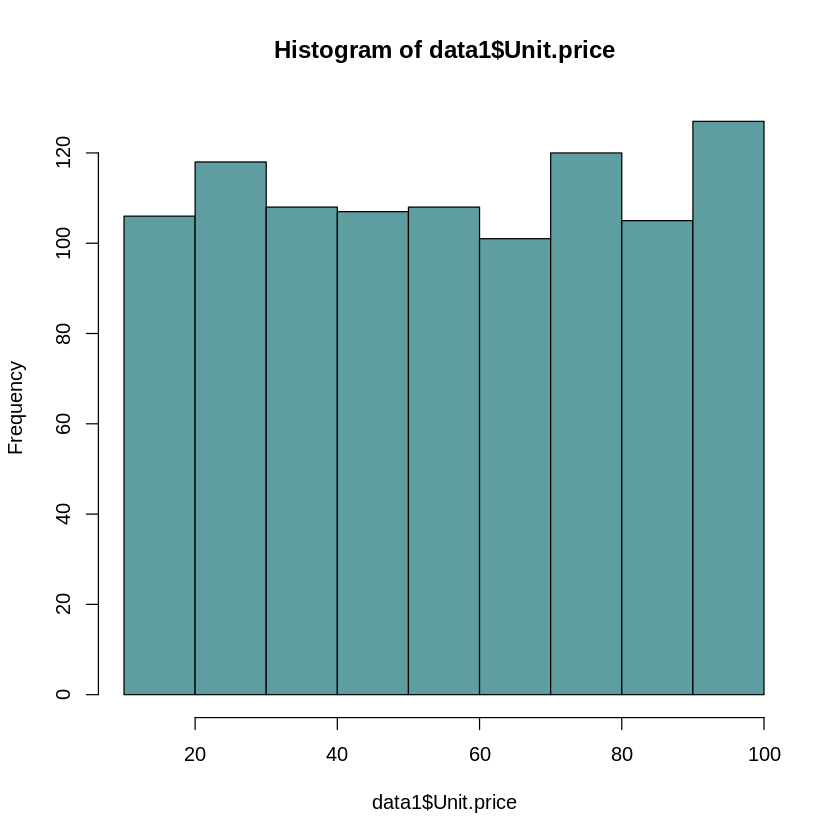

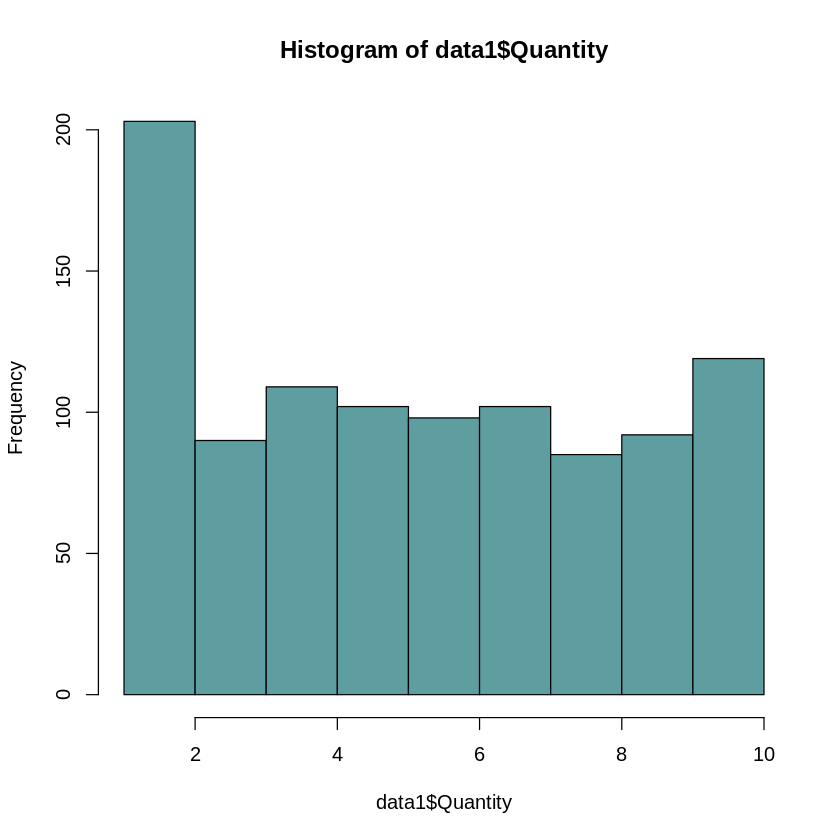

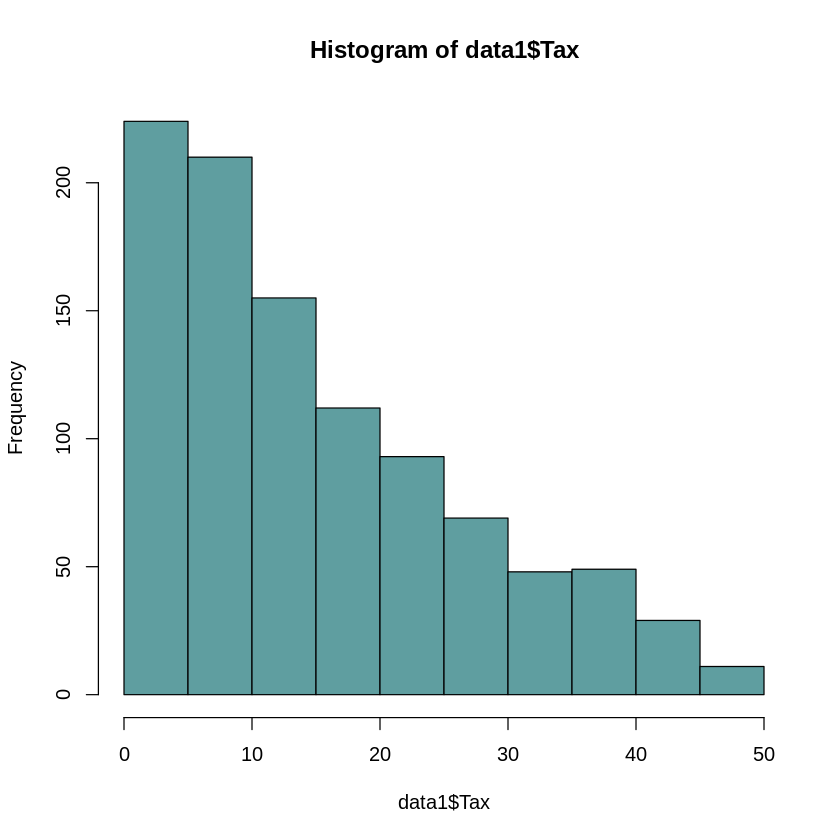

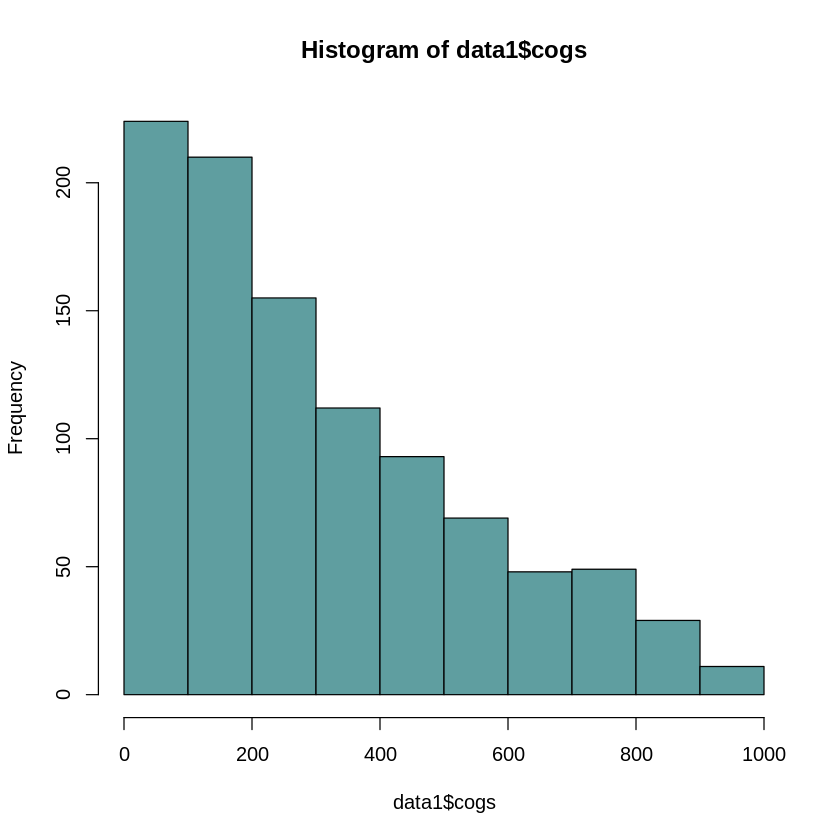

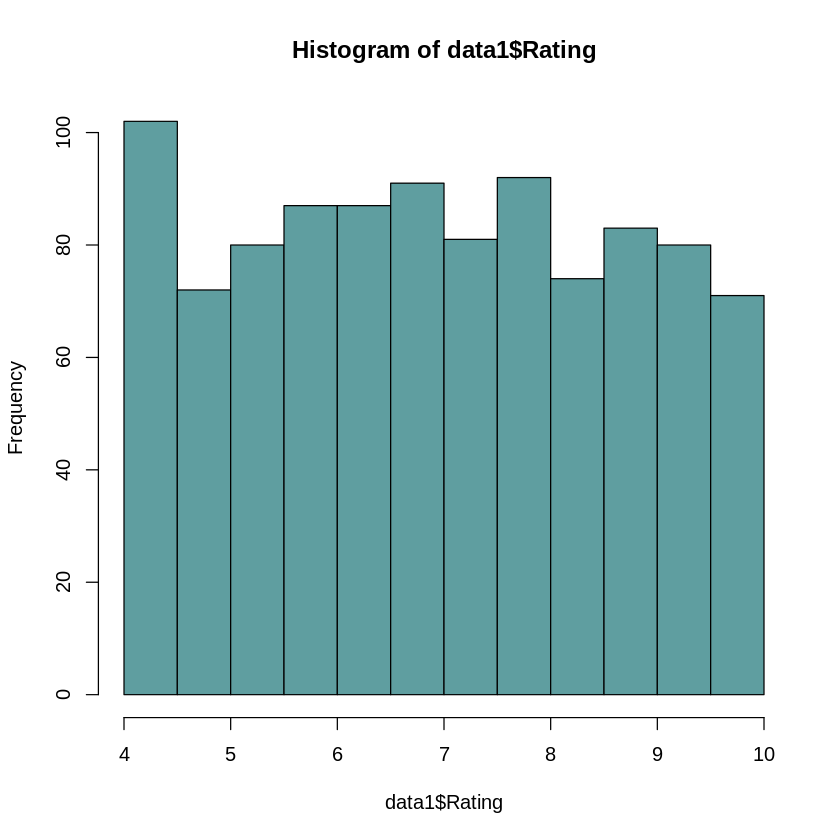

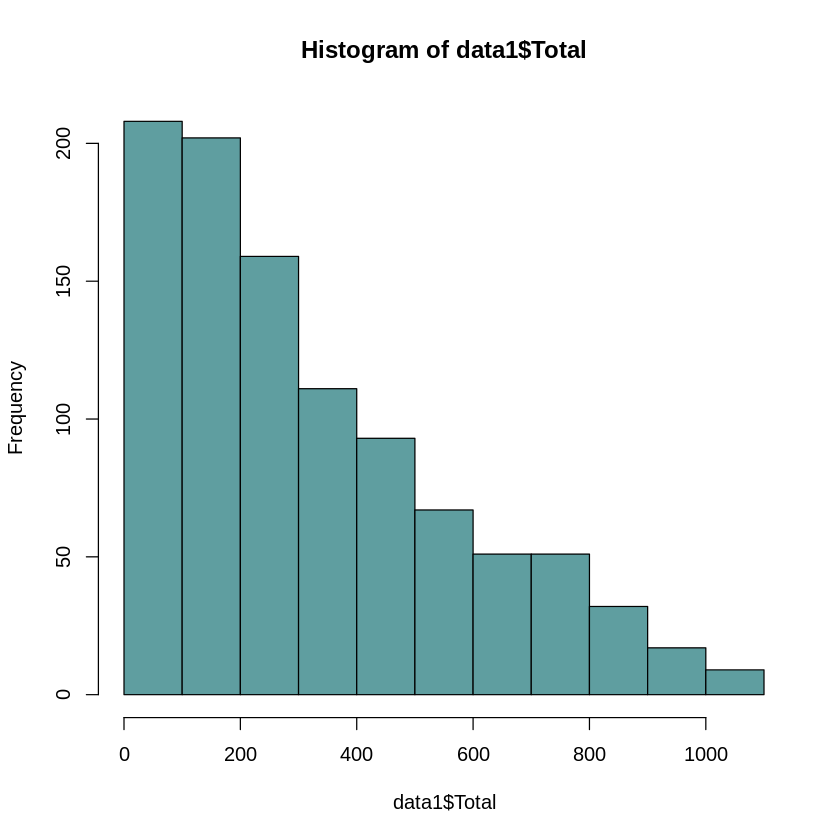

In [ ]:
# Histogram of various continuous numerical variables

hist(data1$Unit.price, col='cadetblue')
hist(data1$Quantity, col='cadetblue')
hist(data1$Tax, col='cadetblue')
hist(data1$cogs, col='cadetblue')
#hist(data1$gross.margin.percentage, col='cadetblue')
#hist(data1$grosss.income, col='cadetblue')
hist(data1$Rating, col='cadetblue')
hist(data1$Total, col='cadetblue')

## Bivariate Analysis

In [ ]:
# Installing ggcorrplot package
install.packages("ggcorrplot") 
# loading the ggcorrplot library       
library("ggcorrplot") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: ggplot2



In [ ]:
# correlation matrix of the numerical columns 
cor(num_df)

Warning message in cor(num_df):
“the standard deviation is zero”


,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
Unit.price,1.000000000,0.01077756,0.6339621,0.6339621,NA,0.6339621,-0.008777507,0.6339621
Quantity,0.010777564,1.00000000,0.7055102,0.7055102,NA,0.7055102,-0.015814905,0.7055102
Tax,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
gross.margin.percentage,NA,NA,NA,NA,1,NA,NA,NA
gross.income,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.01581490,-0.0364417,-0.0364417,NA,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,0.70551019,1.0000000,1.0000000,NA,1.0000000,-0.036441705,1.0000000


Warning message in cor(num_df):
“the standard deviation is zero”


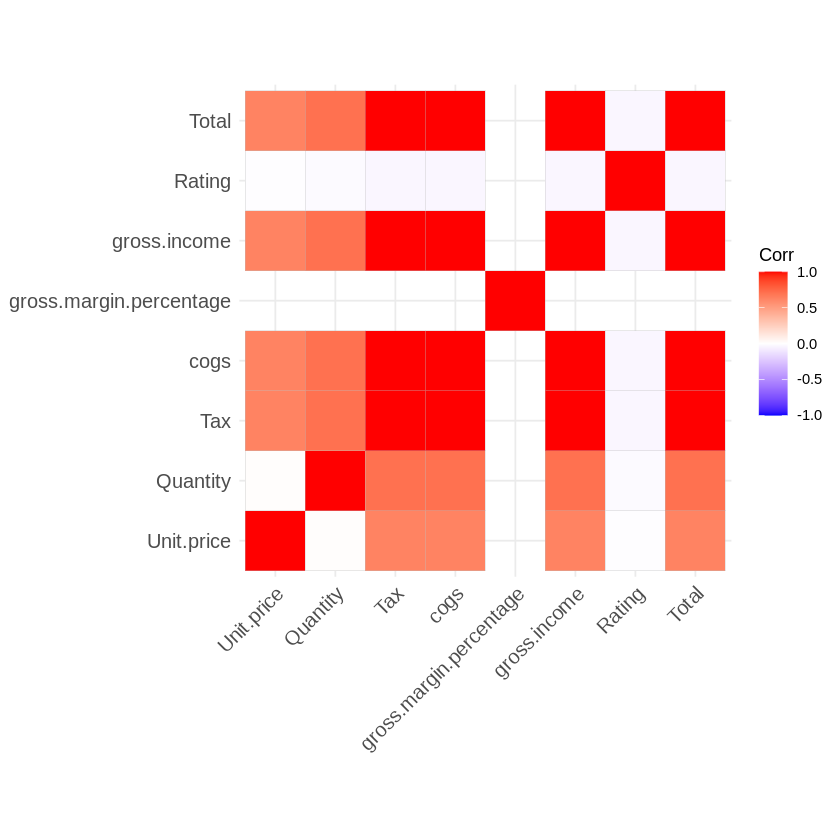

In [ ]:
#Now, we can use the ggcorrplot to create a correlation graph in the style of the ggplot2 package.
# coreelation heatmap
ggcorrplot(cor(num_df))

# Dimensionality Reduction (part 1)

## PCA

In [10]:
# converting the categorical variables to numeric

data1$Branch<-as.numeric(as.factor(data1$Branch))
 # Customer Type
 data1$Customer.type<-as.numeric(as.factor(data1$Customer.type))
# Gender
data1$Gender<-as.numeric(as.factor(data1$Gender))
 # Product.line
data1$Product.line<-as.numeric(as.factor(data1$Product.line))
#Payment
data1$Payment<-as.numeric(as.factor(data1$Payment))
# quantity 
data1$Quantity <- as.numeric(as.factor(data1$Quantity))

In [11]:
# checking the data types of the variables 
str(data1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : num  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 

In [12]:
# checking the standard deviation of variables 
sd(data1$Branch)
sd(data1$Customer.Type)
sd(data1$Gender)
sd(data1$Product.line)
sd(data1$Unit.price)
sd(data1$Quantity)
sd(data1$Tax)
sd(data1$Payment)
sd(data1$cogs)
sd(data1$gross.margin.percentage)
sd(data1$gross.income)
sd(data1$Rating)
sd(data1$Total)


[1] 0.8176335

[1] NA

[1] 0.5002492

[1] 1.715412

[1] 26.49463

[1] 2.923431

[1] 11.70883

[1] 0.830475

[1] 234.1765

[1] 0

[1] 11.70883

[1] 1.71858

[1] 245.8853

In [13]:
data2 <- data1
# drop variables with 0 variance 

data2$Invoice.ID <- NULL
data2$Customer.type<- NULL 
data2$gross.margin.percentage <- NULL
data2$Date <- NULL 
data2$Time <- NULL

In [14]:
# preview of the new dataset
head(data2, 1)

,Branch,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715


In [15]:
# Performing pca using prcomp()
df.pca <- prcomp(data2, center = TRUE, scale. = FALSE)
summary(df.pca)

Importance of components:
                            PC1      PC2     PC3     PC4     PC5     PC6
Standard deviation     340.3819 20.53214 1.73451 1.70026 1.24626 0.84400
Proportion of Variance   0.9963  0.00363 0.00003 0.00002 0.00001 0.00001
Cumulative Proportion    0.9963  0.99992 0.99995 0.99997 0.99999 0.99999
                           PC7    PC8       PC9      PC10      PC11
Standard deviation     0.80117 0.4968 8.345e-14 4.168e-15 1.424e-15
Proportion of Variance 0.00001 0.0000 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.0000 1.000e+00 1.000e+00 1.000e+00

In [16]:
# Calling str() to have a look at your PCA object
str(df.pca)


List of 5
 $ sdev    : num [1:11] 340.38 20.53 1.73 1.7 1.25 ...
 $ rotation: num [1:11, 1:11] 9.86e-05 -7.24e-05 1.59e-04 4.95e-02 6.05e-03 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Branch" "Gender" "Product.line" "Unit.price" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 1.99 1.5 3.45 55.67 5.51 ...
  ..- attr(*, "names")= chr [1:11] "Branch" "Gender" "Product.line" "Unit.price" ...
 $ scale   : logi FALSE
 $ x       : num [1:1000, 1:11] 313 -337.2 23.8 229.5 431.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [17]:
library(devtools)
install_github("vqv/ggbiplot")

# Then Loading our ggbiplot library  
library(ggbiplot)

Loading required package: usethis




plyr (NA -> 1.8.6) [CRAN]


Installing 1 packages: plyr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpuvqgzw/remotes39504ed27d/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



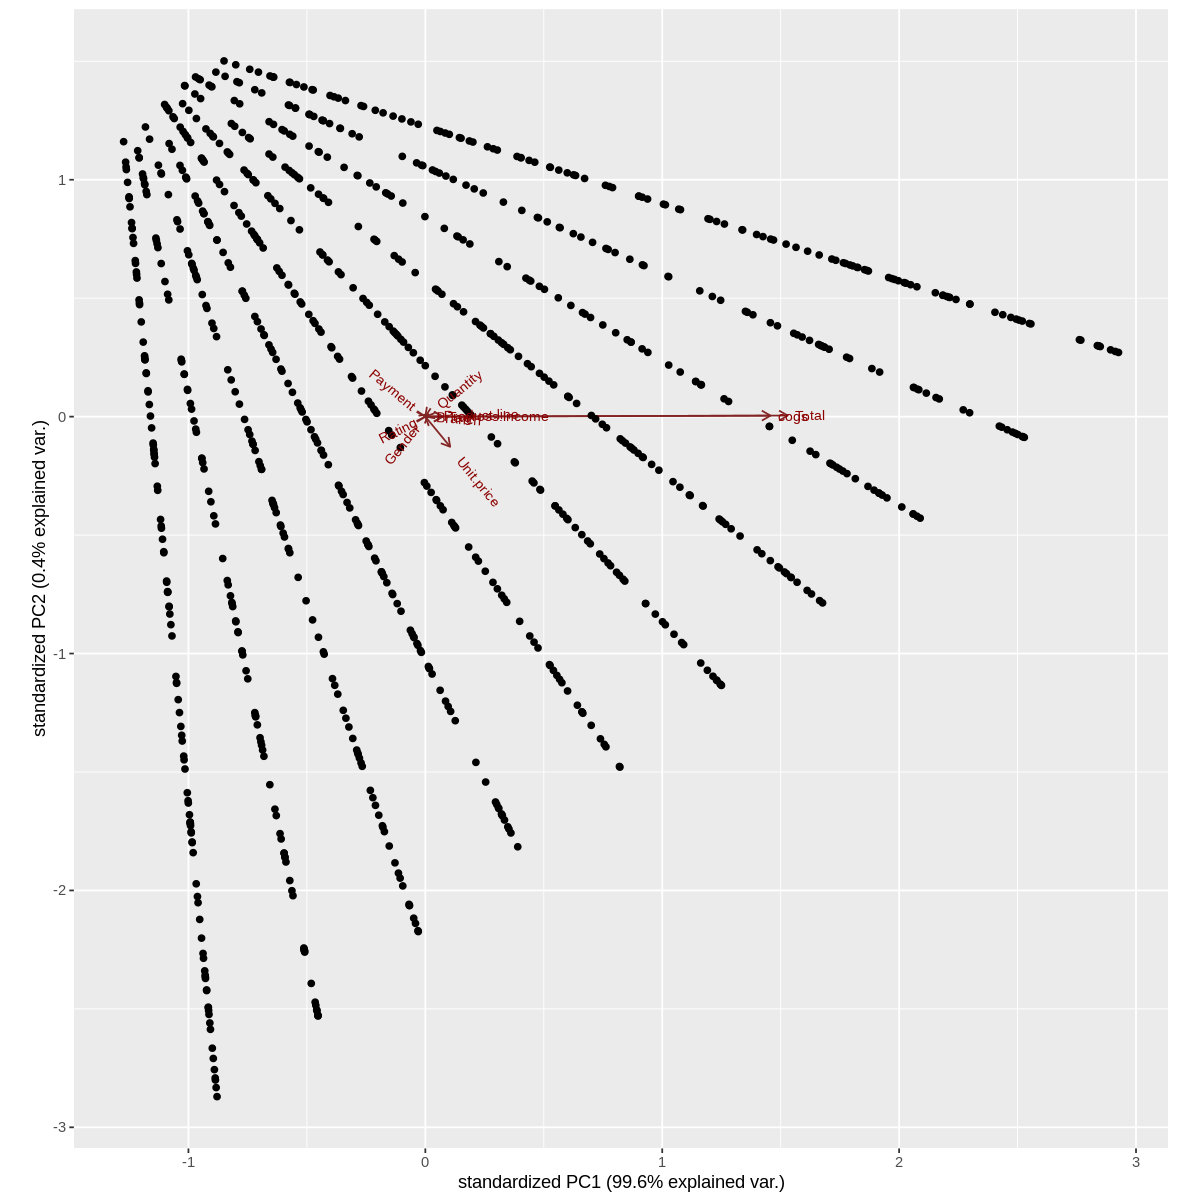

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggbiplot(df.pca)

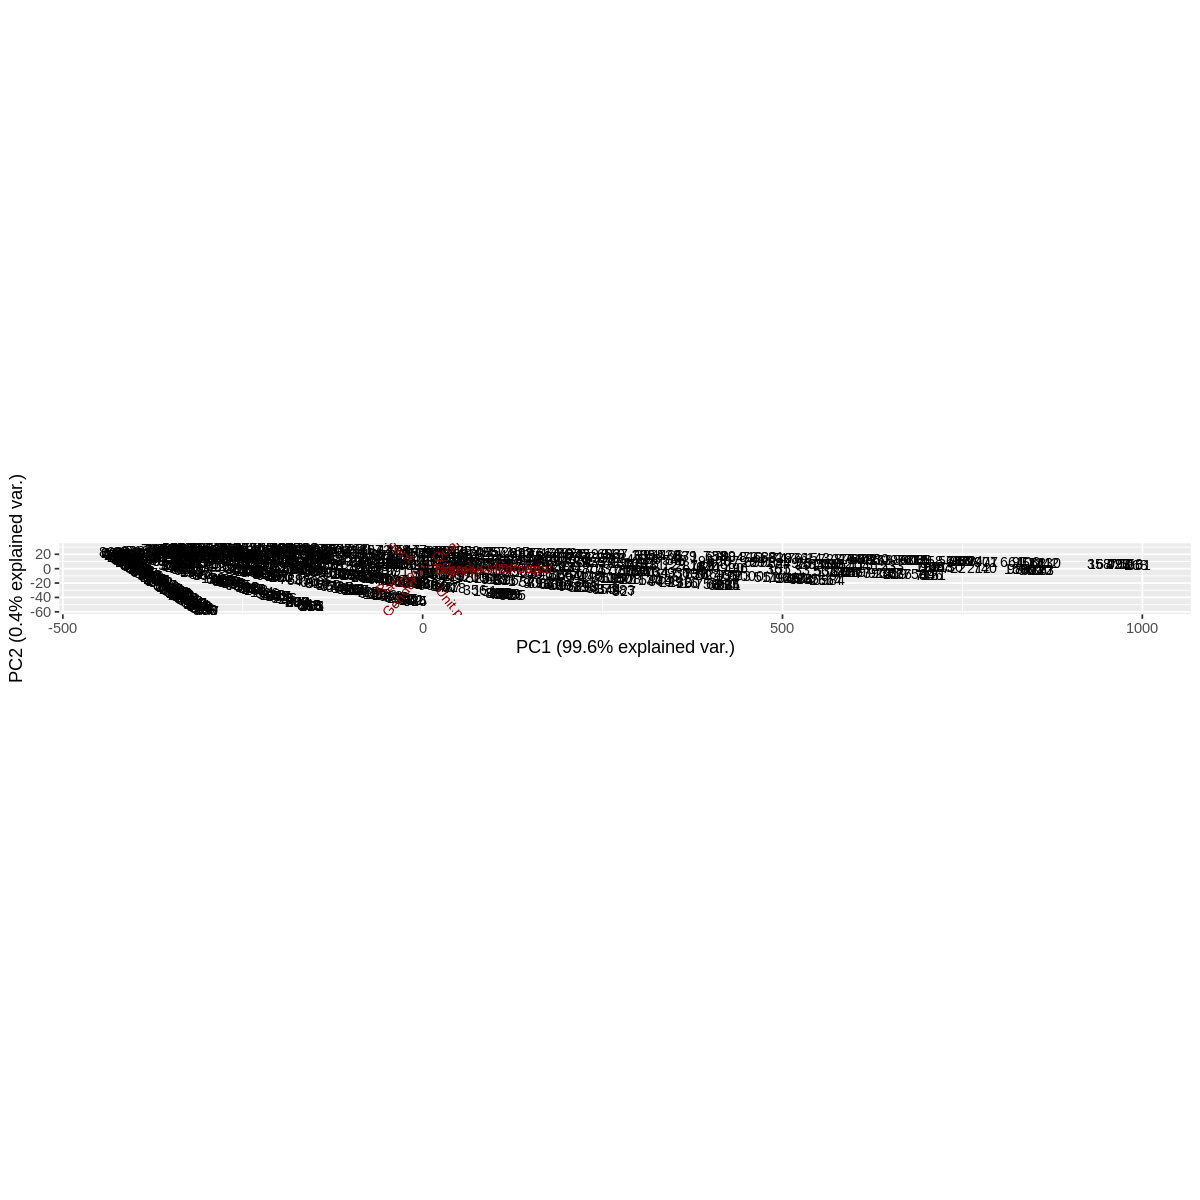

In [19]:
# adding more detail to the plot , we provide arguments rownames as labels 
options(repr.plot.width = 10, repr.plot.height = 10)
ggbiplot(df.pca , labels = rownames(data1),obs.scale = 1, var.scale = 1)


From the graph we see that the variables cogs, unit price, tax and quantity contribute to PC1, with higher
values in those variables moving the samples to the left on the plot(high spenders group). Rating, hour and
month contribute to PC2. We also see that High spenders form a cluster on the left, followed by medium
spenders to it’s right and low spenders respectively. The high spenders cluster is characterized by high
values for gross_income, quantity and unit price. Low spenders are characterized by lower values in all the
mentioned indicators as expected

## T- SNE Reduction 

In [20]:
# Installing Rtnse package 
install.packages("Rtsne")
# Loading our tnse library
library(Rtsne)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
# Executing the algorithm on curated data
#
tsne <- Rtsne(data2, dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 1000 x 11 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101274)!
Learning embedding...
Iteration 50: error is 60.242890 (50 iterations in 0.14 seconds)
Iteration 100: error is 52.175627 (50 iterations in 0.12 seconds)
Iteration 150: error is 50.953115 (50 iterations in 0.12 seconds)
Iteration 200: error is 50.483668 (50 iterations in 0.12 seconds)
Iteration 250: error is 50.178303 (50 iterations in 0.12 seconds)
Iteration 300: error is 0.548036 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.398817 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.364858 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.352483 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.340605 (50 iterations in 0.12 seconds)
Fitting performed in 1.23 seconds.


In [22]:
# Getting the duration of execution
exeTimeTsne <- system.time(Rtsne(num_df[1:8], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))


Performing PCA
Read the 1000 x 8 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101258)!
Learning embedding...
Iteration 50: error is 59.477636 (50 iterations in 0.15 seconds)
Iteration 100: error is 52.611124 (50 iterations in 0.12 seconds)
Iteration 150: error is 51.005980 (50 iterations in 0.12 seconds)
Iteration 200: error is 50.431630 (50 iterations in 0.12 seconds)
Iteration 250: error is 50.131133 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.542848 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.382999 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.341785 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.324091 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.320925 (50 iterations in 0.12 seconds)
Fitting performed in 1.26 seconds.


# Feature Engineering (part 2)

## Feature  Ranking 

In [ ]:
install.packages("FSelector")
#load lib
library(FSelector)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘randomForest’, ‘RWeka’




In [ ]:
#all numerical continous data
df_cont <- num_df[, c(1:4, 6,7,8)]

head(df_cont , 2)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200


In [ ]:
#using linear correlation
Scores <- linear.correlation(Total~., df_cont)
Scores

,attr_importance
,<dbl>
Unit.price,0.6339621
Quantity,0.7055102
Tax,1.0000000
cogs,1.0000000
gross.income,1.0000000
Rating,0.0364417


As can be seen if the target is total then cogs, gross.income plus tax gives total thus the 1.0 importance of both.

In [ ]:
#all numerical continous data without cogs , gross income and tax cols
spmkt_cont <- num_df[,c(1,2,6,7,8)]
#using linear correlation
Scores <- linear.correlation(Total~., spmkt_cont)
Scores

,attr_importance
,<dbl>
Unit.price,0.6339621
Quantity,0.7055102
gross.income,1.0000000
Rating,0.0364417


After dropping cogs, gross income and tax then the new feature ranking has Quantity at 70% being the highest.

In [ ]:
# Instead of using the scores for the correlation coefficient,
# we can use an entropy

#all numerical continous data
spmkt_cont <- num_df[, c(1:4, 6,7,8)]


#Using entropy
Scores2 <- information.gain(Total~., spmkt_cont)
#view importance of feats
Scores2


,attr_importance
,<dbl>
Unit.price,0.3084863
Quantity,0.4211154
Tax,1.6094379
cogs,1.6094379
gross.income,1.6094379
Rating,0.0000000


Same as feature ranking using linear correlation, tax and cogs are equally the most important features.

In [ ]:
#Viewing the important features in descening order
Subset3 <- cutoff.k(Scores2, 4)
as.data.frame(Subset3)

Subset3
<chr>
Tax
cogs
gross.income
Quantity


## Filter Method 

In [ ]:
install.packages("caret")
#load library
library(caret)

install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.88 loaded



In [ ]:
#subset the numerical data for the whole dataset
df_cont <- num_df[, c(1:4, 6,7,8)]


In [ ]:
# Calculating the correlation matrix
correlationMatrix <- cor(df_cont)

#view matrix
correlationMatrix

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
Unit.price,1.000000000,0.01077756,0.6339621,0.6339621,0.6339621,-0.008777507,0.6339621
Quantity,0.010777564,1.00000000,0.7055102,0.7055102,0.7055102,-0.015814905,0.7055102
Tax,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
cogs,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
gross.income,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000
Rating,-0.008777507,-0.01581490,-0.0364417,-0.0364417,-0.0364417,1.000000000,-0.0364417
Total,0.633962089,0.70551019,1.0000000,1.0000000,1.0000000,-0.036441705,1.0000000


In [ ]:
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
highlyCorrelated

[1] 4 7 3

In [ ]:
names(df_cont[,highlyCorrelated])

[1] "cogs"  "Total" "Tax"

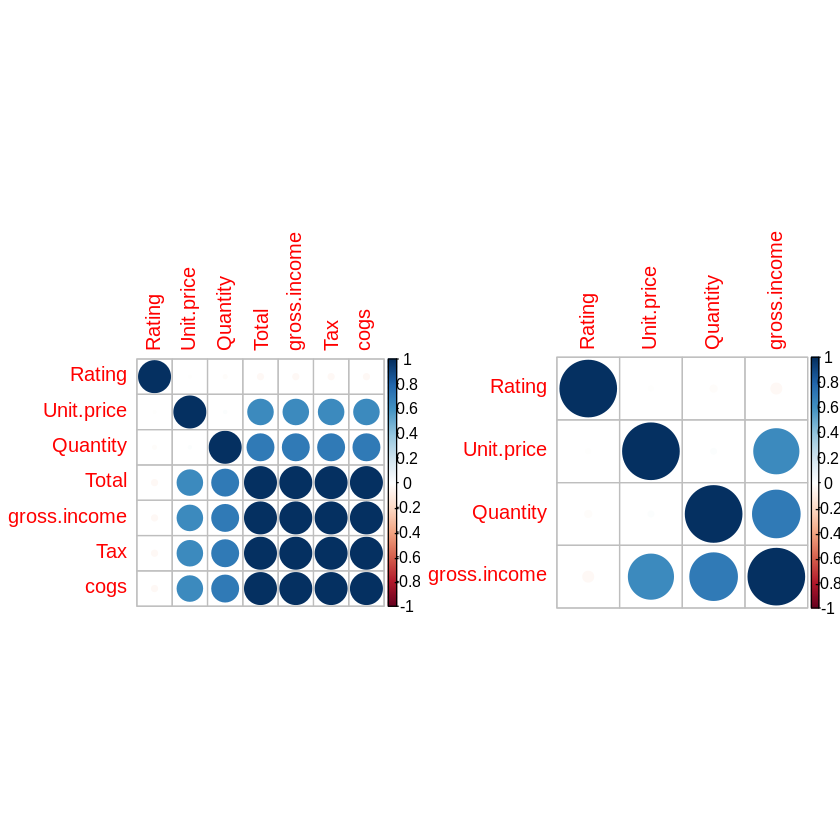

In [ ]:
# We can remove the variables with a higher correlation
# Removing Redundant Features
df_cont1 <- df_cont[-highlyCorrelated]

# Plot 2 graphs for comparison with and without dropping correlated cols
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df_cont1), order = "hclust")



After setting cutoff of 75% correlation 1 column(tax , total and cogs) were dropped and as can be seen from the correlation
matrices above the effect of dropping those columns results in the remaining features having low correlation.

## Wrapper Method 

In [ ]:
# Installing and loading our clustvarsel package
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


# Installing and loading our mclust package
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)


Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Package 'clustvarsel' version 2.3.4

Type 'citation("clustvarsel")' for citing this R package in publications.



In [ ]:
#scale the data
df_contsc <- scale(df_cont)


In [ ]:
# Sequential forward greedy search (default), we use 3 clusters(High, Medium and Low Spenders)
out = clustvarsel(df_contsc, G = 1:3)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G    BICdiff Decision
               Tax          Add -2471.304     V 3  379.38768 Accepted
          Quantity          Add -4300.075   VVV 3  340.18268 Accepted
        Unit.price          Add -3879.002   EVV 3 1765.78979 Accepted
        Unit.price       Remove -4300.075   VVV 3 1765.78979 Rejected
            Rating          Add -6796.945   EEV 3  -67.25104 Rejected
        Unit.price       Remove -4300.075   VVV 3 1765.78979 Rejected

Selected subset: Tax, Quantity, Unit.price

In [ ]:
# The selection algorithm would indicate that the subset
# we use for the clustering model is composed of variables X1 and X2
# and that other variables should be rejected.
# Having identified the variables that we use, we proceed to build the clustering model

Subset1 = df_cont[,out$subset]
mod = Mclust(Subset1, G = 1:3)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood    n df       BIC      ICL
      -8655.763 1000 29 -17511.85 -17609.7

Clustering table:
  1   2   3 
309 375 316 

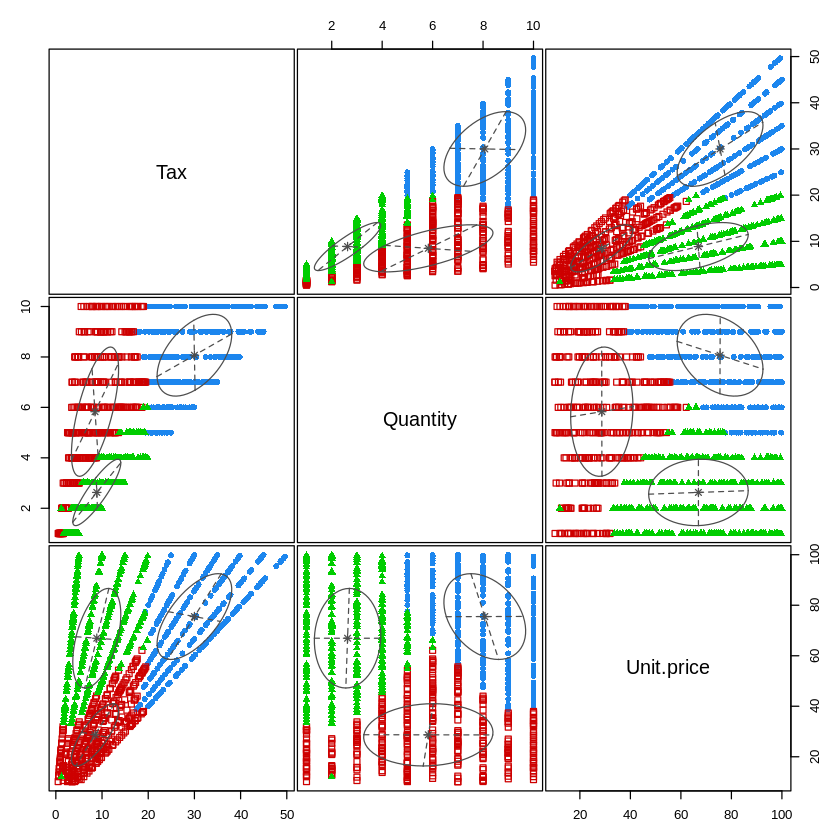

In [ ]:
#plot wrapper
plot(mod,c("classification"))

Using wrapper method, we can observe the clusters it creates for feature selection. The features it selected
were: tax, quantity and unit_price as the most important ones.
